In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/Shareddrives/DATA 270/Final_cleaned_data.csv"
# Dataset is now stored in a Pandas Dataframe

In [ ]:

df = pd.read_csv(path)

In [ ]:
import pandas as pd

In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score  

In [ ]:
df.head()

,Unnamed: 0,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity,County,Date
0,0,236.0,49.0,40.9,5.8,4.0,0.0,66.0,7.0,2000-01-03
1,1,189.0,48.6,41.8,5.9,4.4,0.0,66.0,7.0,2000-01-04
2,2,225.0,49.3,46.4,8.1,9.6,0.0,75.0,7.0,2000-01-05
3,3,203.0,48.8,39.2,6.3,3.5,0.0,78.0,7.0,2000-01-06
4,4,221.0,48.6,42.0,6.1,3.9,0.0,67.0,7.0,2000-01-07


In [ ]:
df.tail(10)

,Unnamed: 0,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity,County,Date
1033426,1033430,71.00,37.80,33.40,6.40,2.8,0.04,98.00,37.0,2020-12-21
1033427,1033431,214.00,38.10,32.80,5.00,3.3,0.00,80.00,37.0,2020-12-22
1033428,1033432,217.00,36.60,26.20,4.20,2.1,0.00,87.00,37.0,2020-12-23
1033429,1033433,135.00,35.40,30.70,3.90,4.4,0.00,67.00,37.0,2020-12-24
1033430,1033434,111.00,36.30,41.80,5.60,15.4,0.00,62.00,37.0,2020-12-25
1033431,1033435,133.00,37.70,37.00,6.60,3.8,0.25,89.00,37.0,2020-12-26
1033432,1033436,105.00,37.10,28.50,5.00,1.6,0.00,94.00,37.0,2020-12-27
1033433,1033437,221.00,35.80,28.90,4.50,2.0,0.00,84.00,37.0,2020-12-28
1033434,1033438,192.00,35.00,26.90,4.30,2.0,0.00,87.00,37.0,2020-12-29
1033435,1033439,150.77,36.66,31.54,5.18,3.3,0.04,85.41,37.0,2020-12-30


In [ ]:
df.shape

(1033436, 10)

In [ ]:
# convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033436 entries, 0 to 1033435
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Unnamed: 0                 1033436 non-null  int64         
 1   Solar Radiation Average    1033436 non-null  float64       
 2   Average Soil Temperature   1033436 non-null  float64       
 3   Average Air Temperature    1033436 non-null  float64       
 4   Average Vapor Pressure     1033436 non-null  float64       
 5   Average Wind Speed         1033436 non-null  float64       
 6   Precipitation              1033436 non-null  float64       
 7   Average Relative Humidity  1033436 non-null  float64       
 8   County                     1033436 non-null  float64       
 9   Date                       1033436 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 78.8 MB


In [ ]:
df.columns


Index(['Unnamed: 0', 'Solar Radiation Average', 'Average Soil Temperature',
       'Average Air Temperature', 'Average Vapor Pressure',
       'Average Wind Speed', 'Precipitation', 'Average Relative Humidity',
       'County', 'Date'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                            int64
Solar Radiation Average             float64
Average Soil Temperature            float64
Average Air Temperature             float64
Average Vapor Pressure              float64
Average Wind Speed                  float64
Precipitation                       float64
Average Relative Humidity           float64
County                              float64
Date                         datetime64[ns]
dtype: object

In [ ]:

df.describe()

,Unnamed: 0,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity,County
count,1.033436e+06,1.033436e+06,1.033436e+06,1.033436e+06,1.033436e+06,1.033436e+06,1.033436e+06,1.033436e+06,1.033436e+06
mean,5.167205e+05,4.340686e+02,6.312272e+01,6.081453e+01,1.145182e+01,4.398058e+00,3.526340e-02,6.130324e+01,2.345953e+01
std,2.983287e+05,1.932480e+02,1.092232e+01,1.275613e+01,9.895283e+01,1.774819e+01,4.009312e-01,2.011112e+01,1.229364e+01
min,0.000000e+00,-3.900000e+01,-3.990000e+01,-3.314000e+02,0.000000e+00,-1.789490e+04,-2.755500e+02,0.000000e+00,0.000000e+00
25%,2.583588e+05,2.770000e+02,5.460000e+01,5.210000e+01,8.200000e+00,3.000000e+00,0.000000e+00,4.600000e+01,1.200000e+01
50%,5.167215e+05,4.400000e+02,6.310000e+01,5.960000e+01,1.090000e+01,3.900000e+00,0.000000e+00,6.300000e+01,2.500000e+01
75%,7.750802e+05,6.020000e+02,7.120000e+01,6.890000e+01,1.370000e+01,5.200000e+00,0.000000e+00,7.800000e+01,3.300000e+01
max,1.033439e+06,7.199000e+03,1.424000e+02,3.808000e+02,4.799000e+04,1.283000e+02,1.651200e+02,1.000000e+02,4.600000e+01


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1033436.0,516720.491910,298328.726751,0.00,258358.75,516721.5,775080.25,1033439.00
Solar Radiation Average,1033436.0,434.068620,193.247955,-39.00,277.00,440.0,602.00,7199.00
Average Soil Temperature,1033436.0,63.122722,10.922319,-39.90,54.60,63.1,71.20,142.40
Average Air Temperature,1033436.0,60.814531,12.756130,-331.40,52.10,59.6,68.90,380.80
Average Vapor Pressure,1033436.0,11.451821,98.952826,0.00,8.20,10.9,13.70,47990.00
Average Wind Speed,1033436.0,4.398058,17.748191,-17894.90,3.00,3.9,5.20,128.30
Precipitation,1033436.0,0.035263,0.400931,-275.55,0.00,0.0,0.00,165.12
Average Relative Humidity,1033436.0,61.303242,20.111124,0.00,46.00,63.0,78.00,100.00
County,1033436.0,23.459534,12.293636,0.00,12.00,25.0,33.00,46.00


In [ ]:

df.isnull().sum()

Unnamed: 0                   0
Solar Radiation Average      0
Average Soil Temperature     0
Average Air Temperature      0
Average Vapor Pressure       0
Average Wind Speed           0
Precipitation                0
Average Relative Humidity    0
County                       0
Date                         0
dtype: int64

In [ ]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8] 

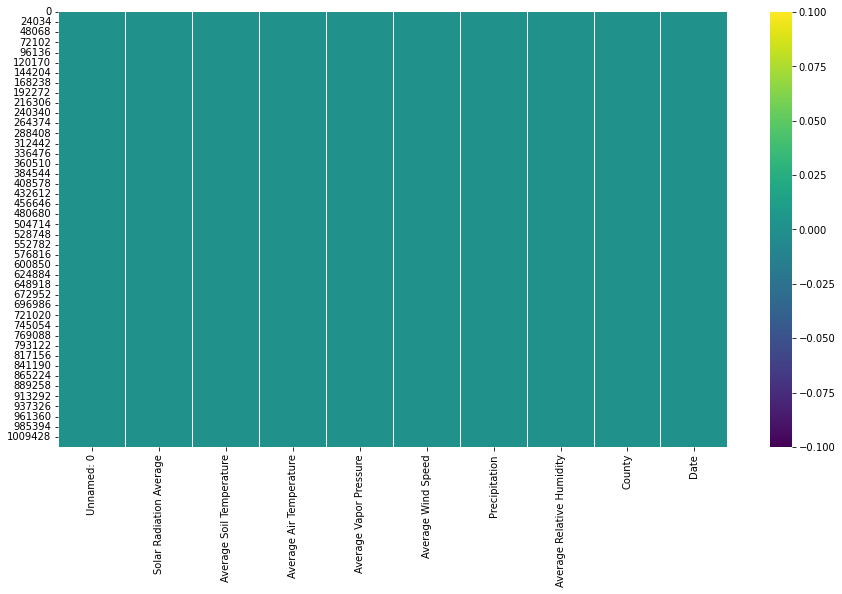

In [ ]:
sns.heatmap(df.isnull(),cmap = 'viridis')

In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 0,0,0.0
Solar Radiation Average,0,0.0
Average Soil Temperature,0,0.0
Average Air Temperature,0,0.0
Average Vapor Pressure,0,0.0
Average Wind Speed,0,0.0
Precipitation,0,0.0
Average Relative Humidity,0,0.0
County,0,0.0
Date,0,0.0


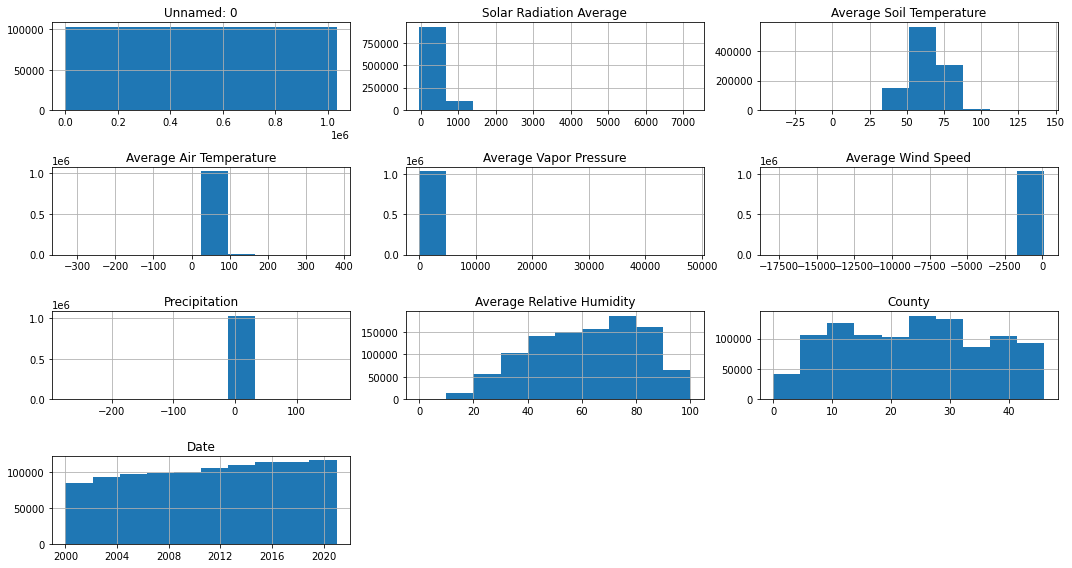

In [ ]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:


# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,Unnamed: 0,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity,County
Unnamed: 0,1.000000,0.020262,-0.008834,0.023046,0.001464,-0.006481,-0.001825,-0.074129,-0.001076
Solar Radiation Average,0.020262,1.000000,0.662010,0.637658,0.011668,0.021775,-0.118230,-0.480244,-0.034754
Average Soil Temperature,-0.008834,0.662010,1.000000,0.857023,0.027416,0.007843,-0.064549,-0.337291,-0.041003
Average Air Temperature,0.023046,0.637658,0.857023,1.000000,0.027522,0.013832,-0.062817,-0.541684,-0.087355
Average Vapor Pressure,0.001464,0.011668,0.027416,0.027522,1.000000,-0.000286,0.000156,0.011573,0.002028
Average Wind Speed,-0.006481,0.021775,0.007843,0.013832,-0.000286,1.000000,0.004745,-0.023278,-0.007702
Precipitation,-0.001825,-0.118230,-0.064549,-0.062817,0.000156,0.004745,1.000000,0.096174,0.009111
Average Relative Humidity,-0.074129,-0.480244,-0.337291,-0.541684,0.011573,-0.023278,0.096174,1.000000,0.151317
County,-0.001076,-0.034754,-0.041003,-0.087355,0.002028,-0.007702,0.009111,0.151317,1.000000


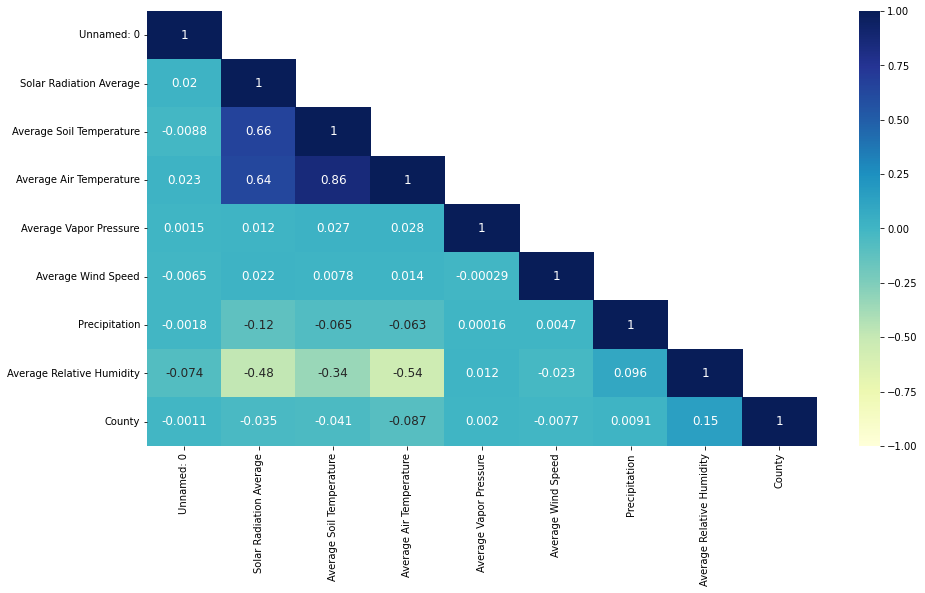

In [ ]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# display the plot
plt.show()

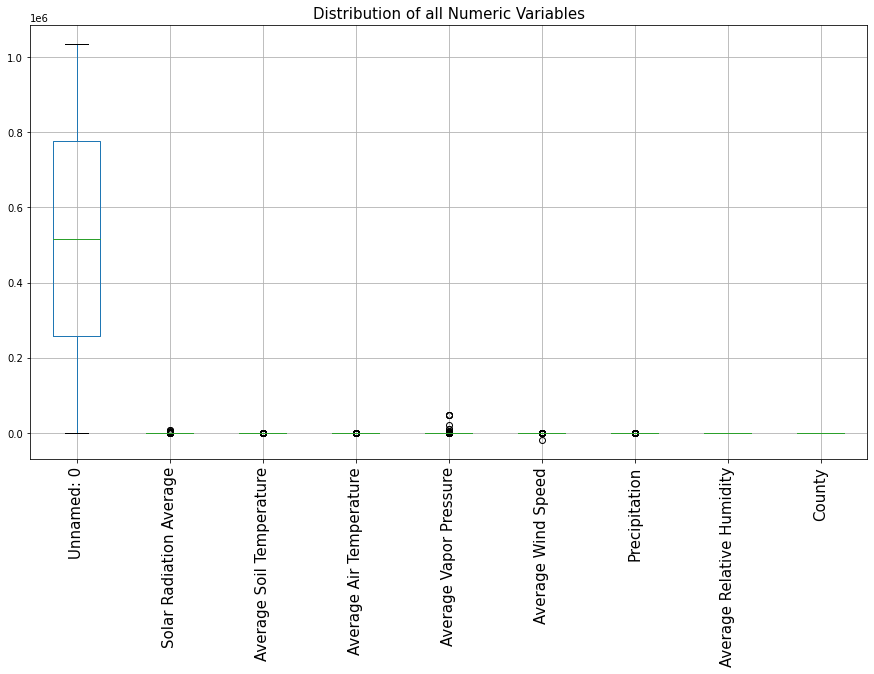

In [ ]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

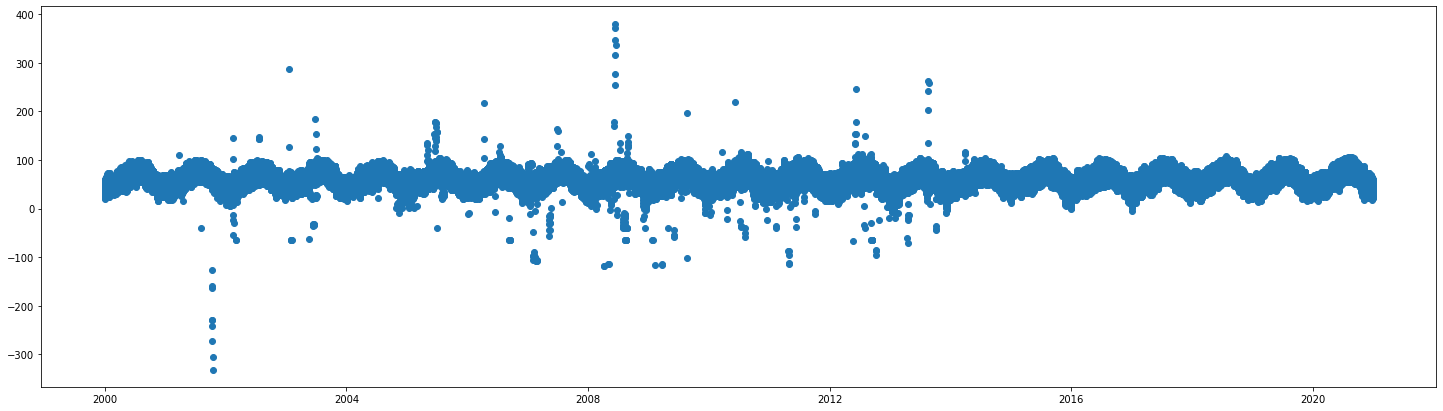

In [ ]:
# scatter plot
plt.rcParams["figure.figsize"] = (25,7)
plt.scatter(df['Date'], df['Average Air Temperature'])
plt.show()

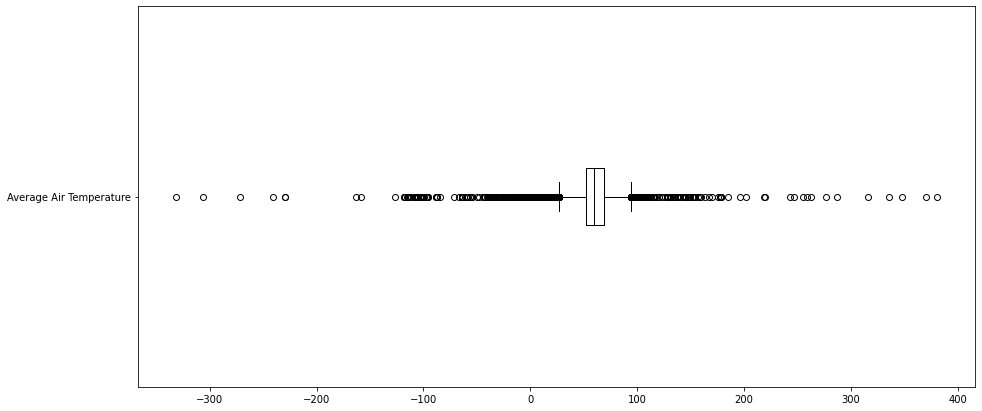

In [ ]:
#boxplot
plt.rcParams["figure.figsize"] = (15,7)
df.boxplot(column=['Average Air Temperature'], grid=False, color='black', vert=False)

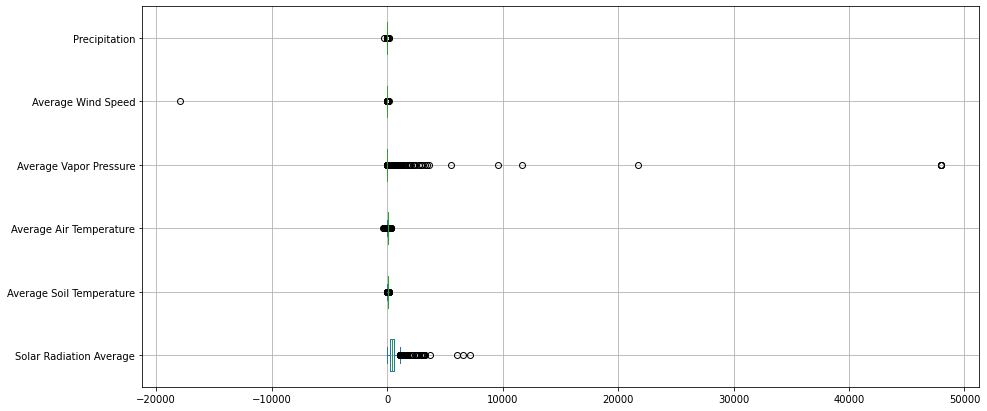

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)
df[['Solar Radiation Average', 'Average Soil Temperature',
       'Average Air Temperature', 'Average Vapor Pressure',
       'Average Wind Speed', 'Precipitation']].plot.box(vert = False, grid = True)

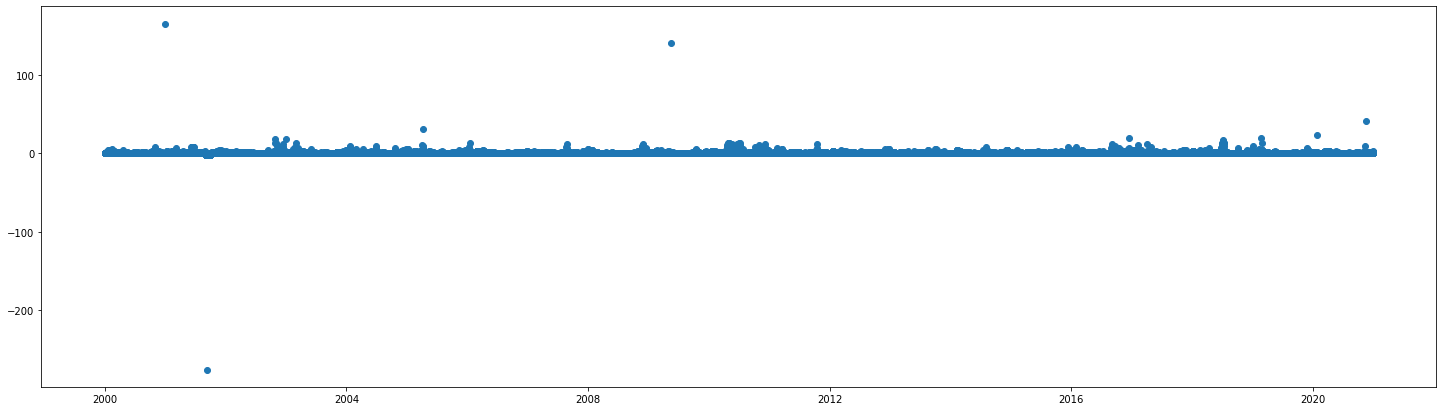

In [ ]:
plt.rcParams["figure.figsize"] = (25,7)
plt.scatter(df['Date'], df['Precipitation'])
plt.show()

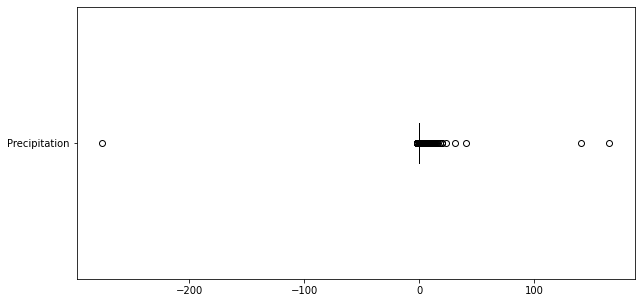

In [ ]:
#boxplot
plt.rcParams["figure.figsize"] = (10,5)
df.boxplot(column=['Precipitation'], grid=False, color='black', vert = False)

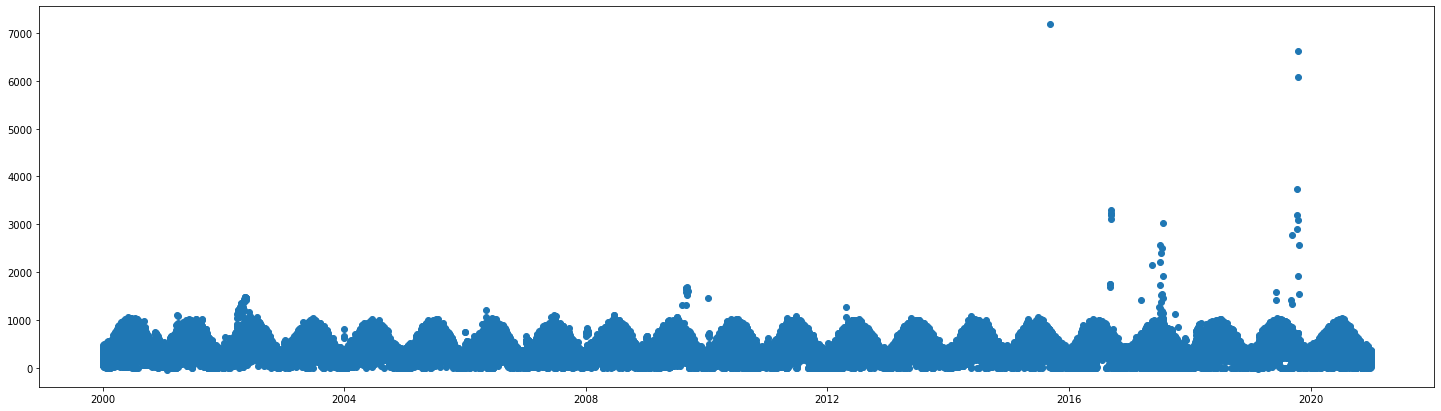

In [ ]:
plt.rcParams["figure.figsize"] = (25,7)
plt.scatter(df['Date'], df['Solar Radiation Average'])
plt.show()

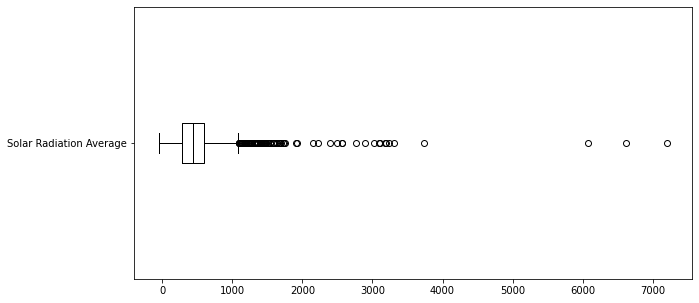

In [ ]:
#boxplot
plt.rcParams["figure.figsize"] = (10,5)
df.boxplot(column=['Solar Radiation Average'], grid=False, color='black', vert = False)

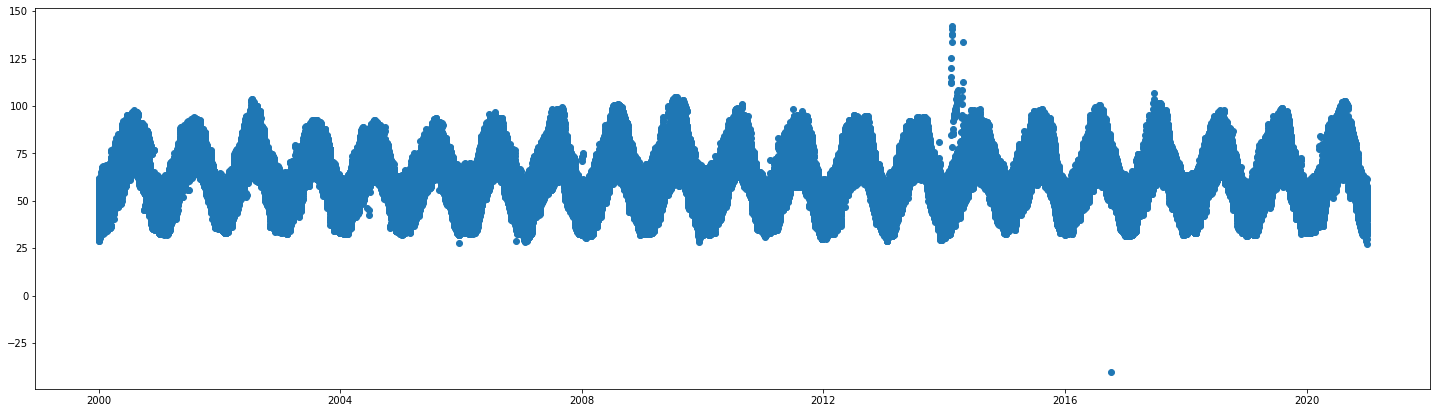

In [ ]:
plt.rcParams["figure.figsize"] = (25,7)
plt.scatter(df['Date'], df['Average Soil Temperature'])
plt.show()

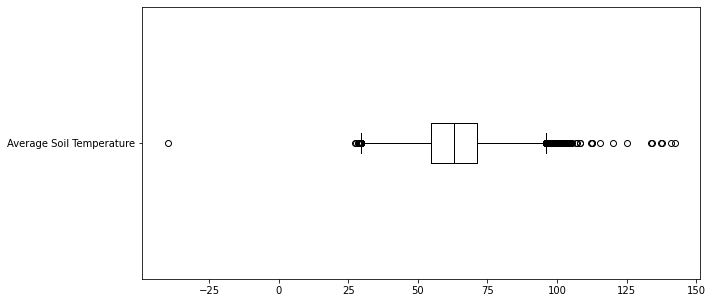

In [ ]:
#boxplot
plt.rcParams["figure.figsize"] = (10,5)
df.boxplot(column=['Average Soil Temperature'], grid=False, color='black', vert = False)

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Unnamed: 0,Solar Radiation Average,Average Soil Temperature,Average Air Temperature,Average Vapor Pressure,Average Wind Speed,Precipitation,Average Relative Humidity,County
Unnamed: 0,1.00,0.02,-0.01,0.02,0.00,-0.01,-0.00,-0.07,-0.00
Solar Radiation Average,0.02,1.00,0.66,0.64,0.01,0.02,-0.12,-0.48,-0.03
Average Soil Temperature,-0.01,0.66,1.00,0.86,0.03,0.01,-0.06,-0.34,-0.04
Average Air Temperature,0.02,0.64,0.86,1.00,0.03,0.01,-0.06,-0.54,-0.09
Average Vapor Pressure,0.00,0.01,0.03,0.03,1.00,-0.00,0.00,0.01,0.00
Average Wind Speed,-0.01,0.02,0.01,0.01,-0.00,1.00,0.00,-0.02,-0.01
Precipitation,-0.00,-0.12,-0.06,-0.06,0.00,0.00,1.00,0.10,0.01
Average Relative Humidity,-0.07,-0.48,-0.34,-0.54,0.01,-0.02,0.10,1.00,0.15
County,-0.00,-0.03,-0.04,-0.09,0.00,-0.01,0.01,0.15,1.00


In [ ]:
pip install pywedge

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import pywedge as pw

x = pw.Pywedge_Charts(df, c = None, y = 'Average Relative Humidity')
charts = x.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

### **Remove outliers by IQR method**

In [ ]:
import numpy as np
col = df.columns[1:-2]
for i in col:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3-q1
  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)
  mean = df[i].mean()
  df[(df[i] < min) & (df[i] > max)][i] = mean
  print(i,iqr)
 

Solar Radiation Average 325.0
Average Soil Temperature 16.6
Average Air Temperature 16.800000000000004
Average Vapor Pressure 5.5
Average Wind Speed 2.2
Precipitation 0.0
Average Relative Humidity 32.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Solar Radiation Average', 'Average Soil Temperature',
       'Average Air Temperature', 'Average Vapor Pressure',
       'Average Wind Speed', 'Precipitation', 'Average Relative Humidity',
       'County', 'Date'],
      dtype='object')

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Solar Radiation Average      0
Average Soil Temperature     0
Average Air Temperature      0
Average Vapor Pressure       0
Average Wind Speed           0
Precipitation                0
Average Relative Humidity    0
County                       0
Date                         0
dtype: int64

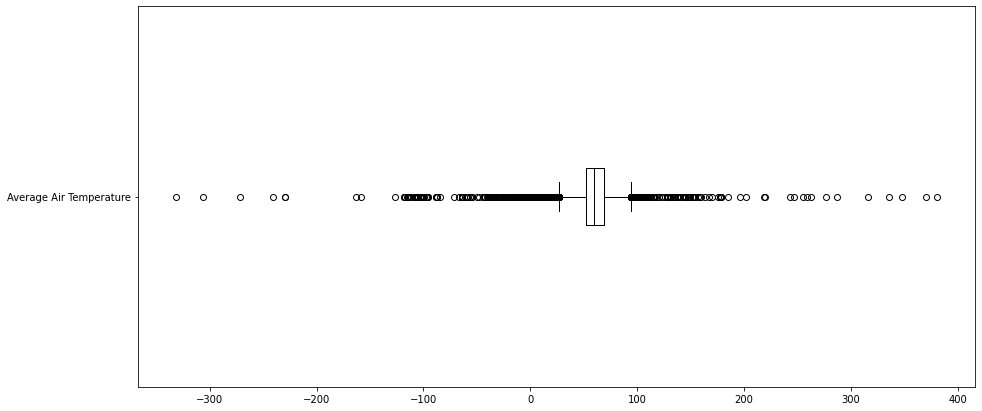

In [ ]:
#boxplot
plt.rcParams["figure.figsize"] = (15,7)
df.boxplot(column=['Average Air Temperature'], grid=False, color='black', vert=False)

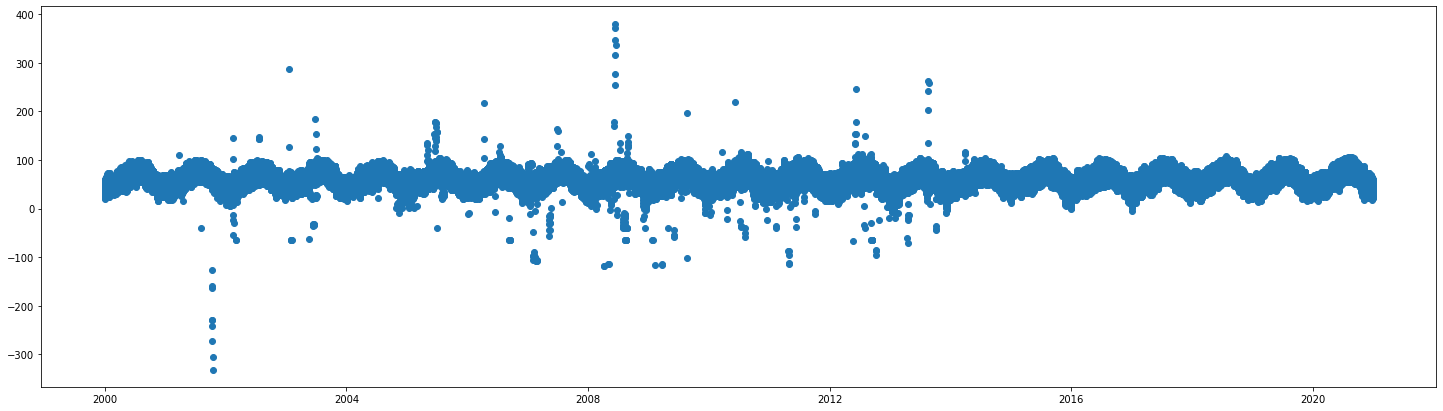

In [ ]:
# scatter plot
plt.rcParams["figure.figsize"] = (25,7)
plt.scatter(df['Date'], df['Average Air Temperature'])
plt.show()

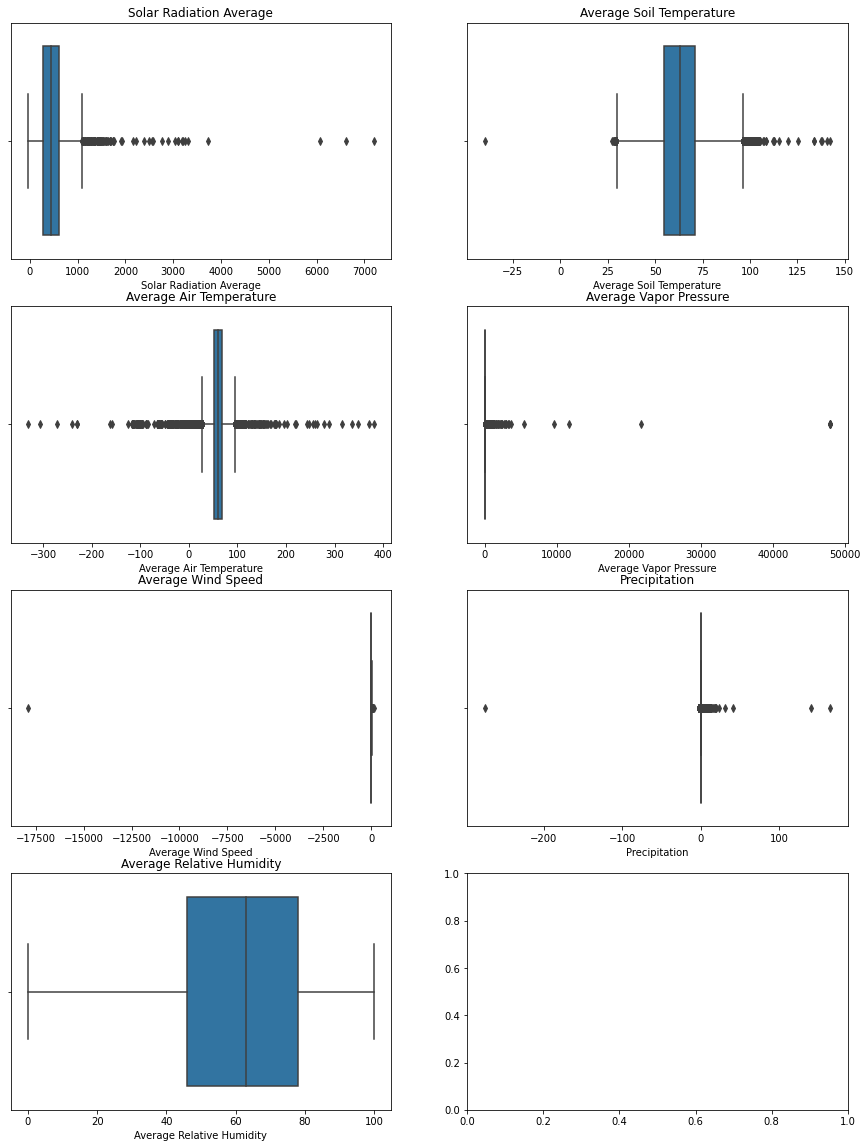

In [ ]:
ax = []
for i in range(0,4):
    for j in range(0,2):
        ax.append([i,j])

fig, axes = plt.subplots(4,2,figsize=(15,20))

for i in range(0,len(col)):
    x,y = ax[i]
    feature = col[i]
    sns.boxplot(x=df[feature], ax=axes[x,y]).set(title=col[i])

plt.show()

In [ ]:
for i in col:
  q1 =df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3-q1
  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)
  if i == 'Precipitation':
    median = df[i].median()
    index = df.index[(df[i] < min) | (df[i] > max)].to_list()
    print(f'{i} No. of Outliers {len(index)}')
    df[(df[i] < min) | (df[i] > max)] = median

    index = df.index[(df[i] < min) | (df[i] > max)].to_list()
    print('After Handling, No. of Outliers ',len(index))
    continue
  mean = df[i].mean()
  index = df.index[(df[i] < min) | (df[i] > max)].to_list()
  print(f'{i} No. of Outliers {len(index)}')
  df[(df[i] < min) | (df[i] > max)] = mean
  index = df.index[(df[i] < min) | (df[i] > max)].to_list()
  print('After Handling, No. of Outliers ',len(index))
 

Solar Radiation Average No. of Outliers 105
After Handling, No. of Outliers  0
Average Soil Temperature No. of Outliers 908
After Handling, No. of Outliers  0
Average Air Temperature No. of Outliers 8141
After Handling, No. of Outliers  0
Average Vapor Pressure No. of Outliers 23732
After Handling, No. of Outliers  0
Average Wind Speed No. of Outliers 69722
After Handling, No. of Outliers  0
Precipitation No. of Outliers 232929
After Handling, No. of Outliers  0
Average Relative Humidity No. of Outliers 0
After Handling, No. of Outliers  0


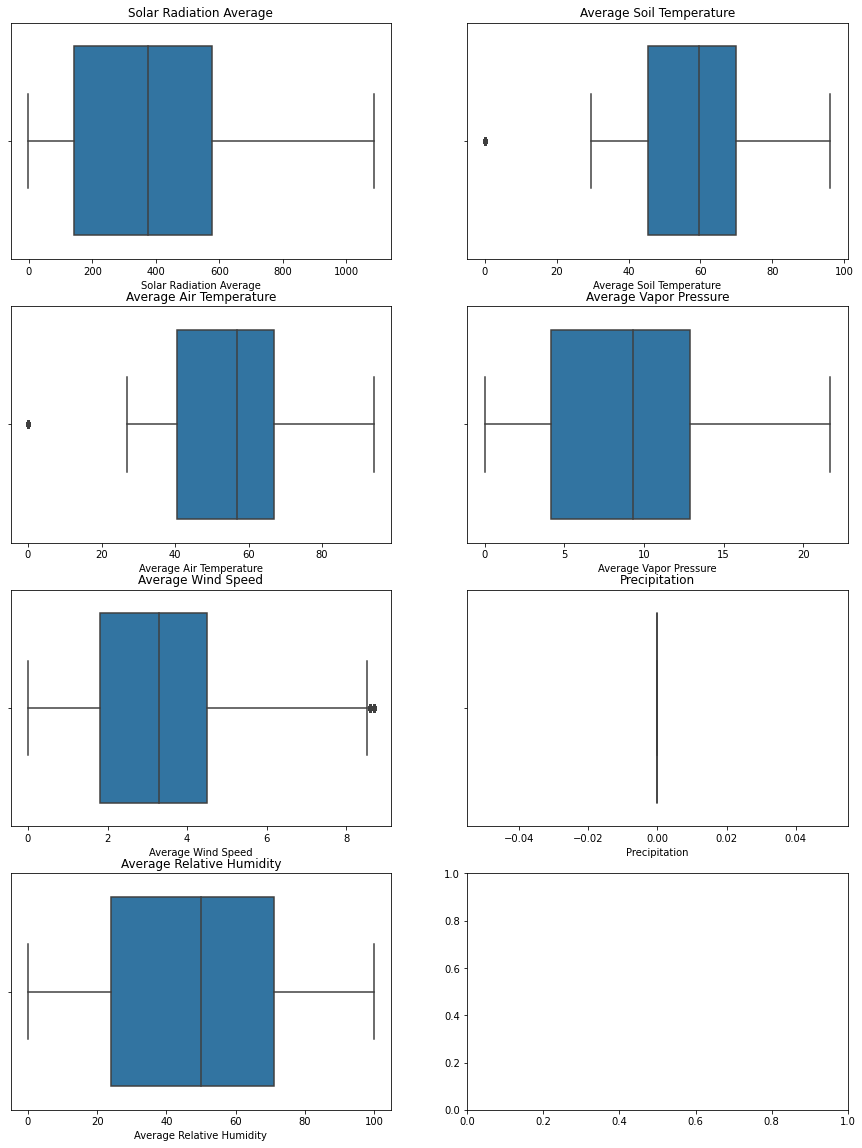

In [ ]:
ax = []
for i in range(0,4):
    for j in range(0,2):
        ax.append([i,j])

fig, axes = plt.subplots(4,2,figsize=(15,20))

for i in range(0,len(col)):
    x,y = ax[i]
    feature = col[i]
    sns.boxplot(x=df[feature], ax=axes[x,y]).set(title=col[i])

plt.show()

In [ ]:
import pywedge as pw

x = pw.Pywedge_Charts(df, c = None, y = 'Average Relative Humidity')
charts = x.make_charts()

ModuleNotFoundError: ignored

In [ ]:
len(df)

1033436

In [ ]:
1033436*100

103343600

In [ ]:
train_size = 0.8 
len(df)*train_size

826748.8

In [ ]:
test_size = 0.2
len(df)*test_size

206687.2

In [ ]:
train_size = 0.8
valid_size=0.1

train_index = int(len(df)*train_size)

# First we need to sort the dataset by the desired column 
df.sort_values(by ='Average Air Temperature', ascending=True, inplace=True)

df_train = df[0:train_index]
df_rem = df[train_index:]

valid_index = int(len(df)*valid_size)

df_valid = df[train_index:train_index+valid_index]
df_test = df[train_index+valid_index:]

X_train, y_train = df_train.drop(columns=df).copy(), df_train[df].copy()
X_valid, y_valid = df_valid.drop(columns=df).copy(), df_valid[df].copy()
X_test, y_test = df_test.drop(columns=df).copy(), df_test[df].copy()
        
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

ValueError: ignored